In [110]:
import autograd.numpy as np  
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [111]:
#Defining some activation functions and their derivative
def ReLU(z):
    return np.where(z > 0, z, 0)

def ReLU_der(z):
    return np.where(z > 0, 1, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_der(z):
    return sigmoid(z) * (1 - sigmoid(z))

def mse(predict, y_train):
    return np.mean((predict - y_train) ** 2)

def mse_der(predict, y_train):
    return 2 * (predict - y_train) / np.prod(predict.shape)

def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=1)[:, np.newaxis]) #substract max per row, avoids instability
    return e_z / np.sum(e_z, axis=1)[:, np.newaxis]

def softmax_vec(z):
    """Compute softmax values for each set of scores in the vector z.
    Use this function when you use the activation function on one vector at a time"""
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

def softmax_der(z):
    return np.ones_like(z) 
#Purely placeholder, combined derivative 
#Cross entropy + softmax simplifies to predict-target

def cross_entropy(predict, target):
    return np.mean(-np.sum(target * np.log(predict + 1e-10), axis=1))

def cross_entropy_der(predict, target):
    return (predict - target) / predict.shape[0]

(400, 1)
(400, 1)
(360, 1)
(360, 1)
[(array([[-4.38367627e-04,  7.05452909e-04, -4.38083596e-04,
         8.06941984e-04, -2.23902655e-04,  3.17573680e-04,
        -1.14022755e-03, -6.17747543e-04, -5.12262630e-04,
        -1.07533468e-03,  6.64785861e-04, -3.84552784e-04,
         3.57265065e-04, -1.24607398e-03,  7.53841486e-04,
        -1.43744552e-03, -7.68926469e-04, -7.19670650e-04,
         5.60762211e-04, -7.82132286e-04,  7.53215747e-04,
        -5.22893968e-04,  4.01579555e-04,  1.34920317e-03,
        -2.65175852e-04,  7.52030889e-04, -4.07146792e-04,
         1.34723806e-03,  7.69646711e-06, -1.35909193e-03,
         8.81302043e-05,  2.67807573e-04,  3.19629531e-04,
        -9.96055726e-04,  1.88856620e-04, -6.59119391e-04,
        -1.17350416e-03,  1.37631677e-03,  1.75184082e-04,
         1.58749446e-04,  5.08720758e-04, -4.08761010e-04,
        -1.56270245e-04,  5.75506601e-05, -2.57868632e-04,
         7.00060293e-05,  3.87204666e-04,  7.45065673e-04,
        -2.1565255

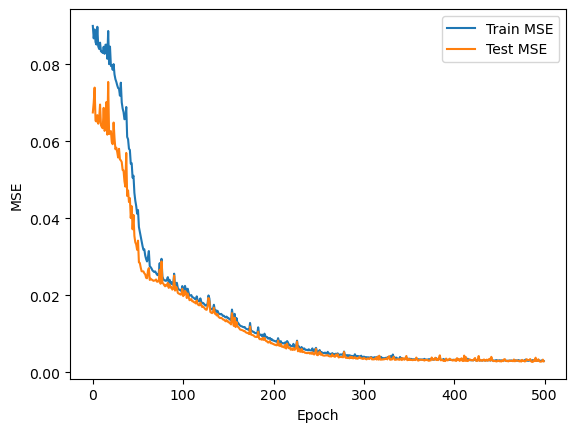

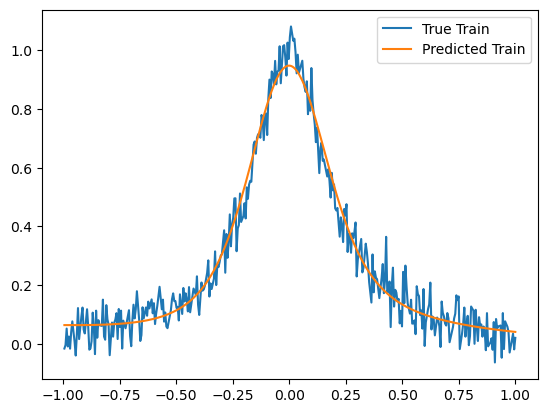

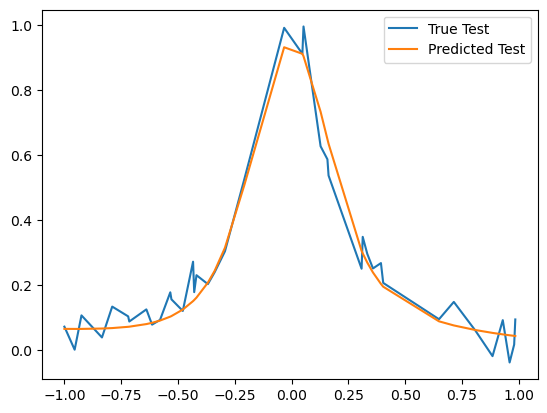

([(array([[-1.18077302, -0.13810914, -0.05189685,  2.51606805,  2.2161348 ,
            2.74806969,  0.65221789,  2.50838683, -0.24488498, -1.27273823,
            0.75645267, -1.3790838 ,  0.66652072,  0.07212127, -0.76123737,
           -2.01867657, -1.62899306, -0.64924621,  1.44634462,  0.1672874 ,
            1.3722573 , -1.45672385, -0.25330927, -0.20187228, -2.66331896,
            1.95226137,  2.14142152, -0.17698496,  2.31201051,  0.47809398,
            1.31972876,  0.08620758, -2.20644009, -1.07927062, -2.38012341,
           -2.63195291,  0.51456543,  0.50761418, -1.47577525, -2.65393447,
            1.69322844,  0.13184113,  3.39878222,  1.77925658,  1.38433595,
           -2.21950745,  2.19726677,  1.87951204,  0.54340885, -1.6595752 ]]),
   array([ 0.01486889,  0.0334608 ,  0.00351626,  0.14832073,  0.08991021,
          -0.07330473,  0.02348578,  0.03748287, -0.0263742 , -0.00634526,
          -0.00785193,  0.01697277, -0.01096775, -0.0388026 ,  0.05363415,
           0

In [112]:
from sklearn.model_selection import train_test_split
import numpy as np  # Regular np is fine here
import matplotlib.pyplot as plt

def runge(x):
    return 1 / (1 + 25 * x**2)

batch_size = 400
x = np.linspace(-1, 1, batch_size).reshape(-1, 1)
y = runge(x) + 0.05 * np.random.normal(0, 1, batch_size).reshape(-1, 1)

network_input_size = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
print(x.shape)
print(y.shape)
print(x_train.shape)
print(y_train.shape)

# Better init (He for ReLU)
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []
    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        std = np.sqrt(2 / i_size)  # He init
        W = np.random.randn(i_size, layer_output_size) * std  # Flipped dims for clarity
        b = np.zeros(layer_output_size)
        layers.append((W, b))
        i_size = layer_output_size
    return layers

# Update forward/backprop for new W shape (x @ W)
def feed_forward_saver_batch(x, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = x
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = a @ W + b
        a = activation_func(z)
        zs.append(z)
    return layer_inputs, zs, a

def feed_forward(x, layers, activation_funcs):
    a = x
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = a @ W + b
        a = activation_func(z)
    return a

def backpropagation_batch(x, layers, activation_funcs, y, activation_ders, cost_der=mse_der):
    layer_inputs, zs, predict = feed_forward_saver_batch(x, layers, activation_funcs)
    layer_grads = [() for _ in layers]
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]
        if i == len(layers) - 1:
            dC_da = cost_der(predict, y)
        else:
            (W_next, _) = layers[i + 1]
            dC_da = dC_dz @ W_next.T
        dC_dz = dC_da * activation_der(z)
        dC_dW = layer_input.T @ dC_dz
        dC_db = np.sum(dC_dz, axis=0)
        layer_grads[i] = (dC_dW, dC_db)
    return layer_grads

layer_output_sizes = [50, 50, 1]
activation_funcs = [ReLU, ReLU, lambda x: x]  # ReLU hidden, linear output
activation_ders = [ReLU_der, ReLU_der, lambda x: np.ones_like(x)]

activation_funcs = [sigmoid, sigmoid, lambda x: x]  # ReLU hidden, linear output
activation_ders = [sigmoid_der, sigmoid_der, lambda x: np.ones_like(x)]

learning_rate = 0.1
epochs = 500
train_batch_size = 18  # Add mini-batching

layers = create_layers_batch(network_input_size, layer_output_sizes)
comp = backpropagation_batch(x_train, layers, activation_funcs, y_train, activation_ders)
print(comp)

def train_network(x_train, x_test, y_train, y_test, layers, activation_funcs, activation_ders, learning_rate, epochs, batch_size=32):
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        # Shuffle
        perm = np.random.permutation(x_train.shape[0])
        x_shuffled = x_train[perm]
        y_shuffled = y_train[perm]
        
        # Mini-batch loop
        for start in range(0, x_train.shape[0], batch_size):
            end = min(start + batch_size, x_train.shape[0])
            input_batch = x_shuffled[start:end]
            target_batch = y_shuffled[start:end]
            
            layers_grad = backpropagation_batch(input_batch, layers, activation_funcs, target_batch, activation_ders, cost_der=mse_der)
            for (W, b), (W_g, b_g) in zip(layers, layers_grad):
                W -= learning_rate * W_g
                b -= learning_rate * b_g
        
        # Losses
        train_pred = feed_forward(x_train, layers, activation_funcs)
        test_pred = feed_forward(x_test, layers, activation_funcs)
        train_mse = mse(train_pred, y_train)
        test_mse = mse(test_pred, y_test)
        train_losses.append(train_mse)
        test_losses.append(test_mse)
        print(f"Epoch {epoch+1}, Train MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")
    
    # Plot losses
    plt.plot(train_losses, label='Train MSE')
    plt.plot(test_losses, label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()
    
    # Plot predictions (sorted for curve visualization)
    sort_idx_train = np.argsort(x_train[:, 0])
    plt.plot(x_train[sort_idx_train], y_train[sort_idx_train], label='True Train')
    plt.plot(x_train[sort_idx_train], train_pred[sort_idx_train], label='Predicted Train')
    plt.legend()
    plt.show()
    
    sort_idx_test = np.argsort(x_test[:, 0])
    plt.plot(x_test[sort_idx_test], y_test[sort_idx_test], label='True Test')
    plt.plot(x_test[sort_idx_test], test_pred[sort_idx_test], label='Predicted Test')
    plt.legend()
    plt.show()
    
    return layers, train_losses, test_losses

train_network(x_train, x_test, y_train, y_test, layers, activation_funcs, activation_ders, learning_rate, epochs, train_batch_size)

In [113]:
"""
#Gradient verification with autograd
network_input_size = 4
batch_size = 400
layer_output_sizes = [3, 4]
activation_funcs = [sigmoid, ReLU]
activation_ders = [sigmoid_der, ReLU_der]
la = create_layers_batch(network_input_size, layer_output_sizes)

x = np.random.randn(batch_size, network_input_size)
input = x
target = np.random.rand(4)

computed = backpropagation_batch(input, la, activation_funcs, target, activation_ders)
print(computed[-1][0][0])

#Verify gradients
def cost(x_train, layers, activation_funcs, y_train):
    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]
    return mse(predict, y_train)
cost_grad = grad(cost, 1)
autoG = cost_grad(input, la, activation_funcs, target)
print(autoG[-1][0][0])

diff = 0
for i in range(len(computed)):
    diff += abs(computed[-1][0][0][i])-abs(autoG[-1][0][0][i])
if diff <= 10**-6:
    print("Same gradients")

#Verify gradients
def cost(x_train, layers, activation_funcs, y_train):
    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]
    return mse(predict, y_train)
"""


'\n#Gradient verification with autograd\nnetwork_input_size = 4\nbatch_size = 400\nlayer_output_sizes = [3, 4]\nactivation_funcs = [sigmoid, ReLU]\nactivation_ders = [sigmoid_der, ReLU_der]\nla = create_layers_batch(network_input_size, layer_output_sizes)\n\nx = np.random.randn(batch_size, network_input_size)\ninput = x\ntarget = np.random.rand(4)\n\ncomputed = backpropagation_batch(input, la, activation_funcs, target, activation_ders)\nprint(computed[-1][0][0])\n\n#Verify gradients\ndef cost(x_train, layers, activation_funcs, y_train):\n    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]\n    return mse(predict, y_train)\ncost_grad = grad(cost, 1)\nautoG = cost_grad(input, la, activation_funcs, target)\nprint(autoG[-1][0][0])\n\ndiff = 0\nfor i in range(len(computed)):\n    diff += abs(computed[-1][0][0][i])-abs(autoG[-1][0][0][i])\nif diff <= 10**-6:\n    print("Same gradients")\n\n#Verify gradients\ndef cost(x_train, layers, activation_funcs, y_train):\n    